In [7]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.tri as tri
import datetime 
import time
#import netcdftime
import sys
import glob
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import os
from scipy.interpolate import griddata
import csv
#from mpl_toolkits.basemap import Basemap
from scipy import interpolate
import xarray as xr
import seaborn as sns

In [219]:
base_path = '/data/hubhome/s6mabohm/Masterarbeit/BL_height_data/'
file_template = 'fc_DOM01_00{}_grid_{}_urban.nc'

time_steps = ['09', '10', '11', '12', '13', '14', '15', '16', '17']
dataset_types = ['OPR22', 'URB22']

ds = {'OPR22': {}, 'URB22': {}}

for time_step in time_steps:
    for dataset_type in dataset_types:
        file_path = base_path + file_template.format(time_step, dataset_type)
        ds[dataset_type][time_step] = xr.open_dataset(file_path)


In [218]:
#calculate potential temperature 

# Define the constant 
c = 0.28571  

for dataset_type in dc = 0.28571  # Example value, replace with the actual value you need

# Perform the operation to calculate theta for both OPR22 and URB22
for dataset_type in dataset_types:
    for time_step in time_steps:
        current_ds = ds[dataset_type][time_step]
        current_ds['theta'] = current_ds['T'] * (current_ds['PMSL'] / current_ds['P']) ** c
ataset_types:
    for time_step in time_steps:
        ds = ds[dataset_type][time_step]
        ds['theta'] = ds['T'] * (ds['PMSL'] / ds['P']) ** c

KeyError: 'OPR22'

In [217]:
ds['OPR22']['09'].H_ML_LK.mean()

KeyError: 'OPR22'

In [187]:
ds['URB22']['09'].H_ML_LK.mean()

<xarray.DataArray 'H_ML_LK' ()>
array(0.17408511, dtype=float32)

In [33]:
sns.set_style("whitegrid")

In [189]:
#open height level file

hhl_file = xr.open_dataset("/data/hubhome/s6mabohm/Masterarbeit/hhl.nc")
hhl = hhl_file.variables["HHL"][0,:,:]#[::-1]
hhl_f = hhl
### Full levels: because the levels are defined at half levels, it is corrected here
for k in range(1,hhl.shape[0]):
    hhl_f[k,:] = hhl[k,:] + (hhl[k,:]-hhl[k-1,:])/2


/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects ins

In [171]:
height = []

for i in range(120):
    b = hhl_f[i, 74].values
    height.append(b)

height = np.stack(height)
#print(height)
len(height)

120

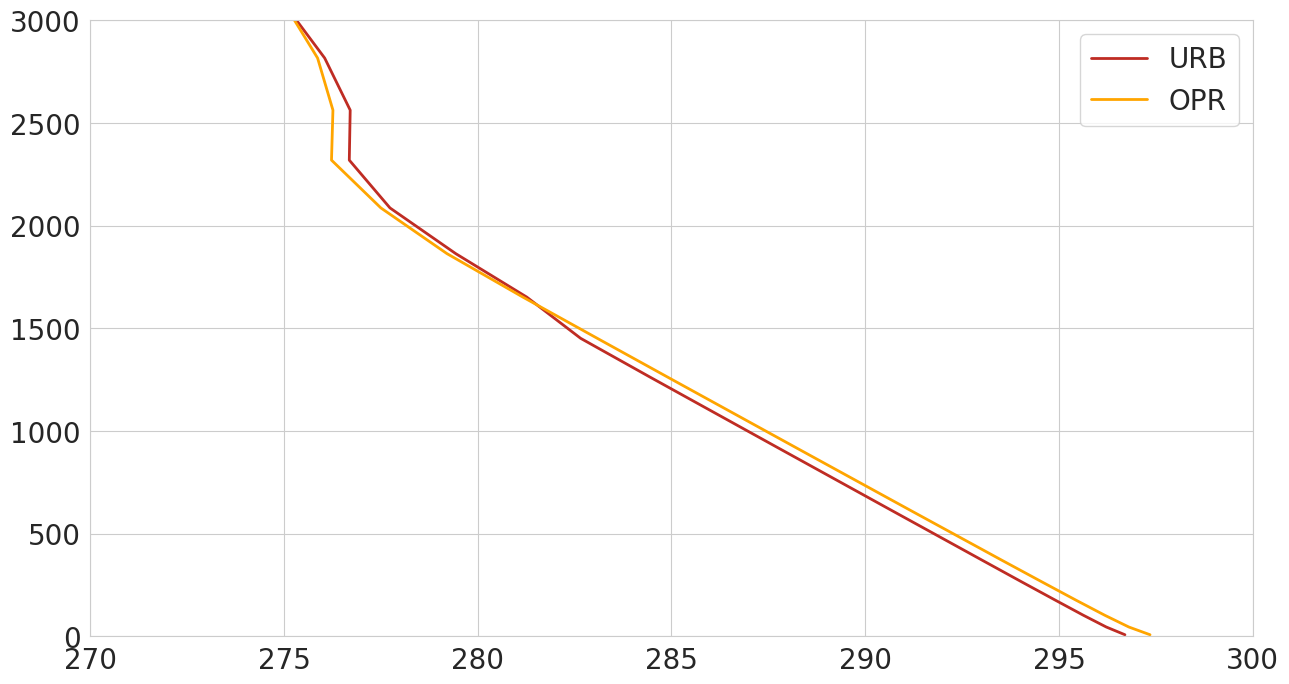

In [191]:
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ds['OPR22']['09'].T.isel(cell=74).values[0], height , label='URB', color='#BF2C23', lw = 2)
ax.plot(ds['URB22']['09'].T.isel(cell=74).values[0], height, label='OPR', color='orange', lw = 2)

ax.grid(True)


ax.set_ylim(0, 3000)
ax.set_xlim(270, 300)


# Set labels and titleax.set_ylabel('Height [m]')
plt.legend()